In [4]:
import networkx as nx
%load_ext autoreload
%autoreload 2
import argparse
import collections
import torch
import torch_geometric
import numpy as np
import data_loader.data_loaders as module_data
from torch_geometric.utils import to_networkx, from_networkx
import model.loss as module_loss
import model.metric as module_metric
import model.model as module_arch
from parse_config import ConfigParser
# del Trainer
from trainer import Trainer
from utils import prepare_device
from model import model
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
graph_dir = "./data/graph_list_hier/myGraph_0.gpickle"
graph = nx.read_gpickle(graph_dir)
demand_graph = from_networkx(graph, group_edge_attrs=["weight"])
print([e for e in graph.edges(data=True) if e[2]["weight"]>1])
# graph = nx.from_networkx(graph, group_edge_attrs=['weight'])



In [ ]:
degree_cent = nx.degree_centrality(graph)
eigen_cent = nx.eigenvector_centrality(graph)
page_rank = nx.pagerank_numpy(graph)
# print("centrality", nx.average_clustering(graph))


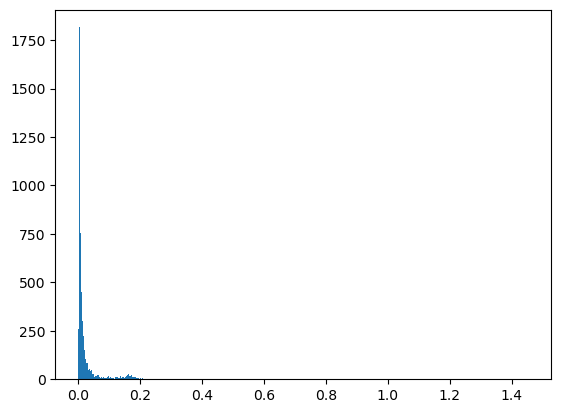

In [6]:
plt.hist(nx.degree_centrality(graph).values(),bins=1000)
plt.show()
plt.hist(nx.betweenness_centrality(graph).values(),bins=1000)
plt.show()
plt.hist(nx.pagerank_numpy(graph).values(),bins=1000)
plt.show()